In [1]:
#import SparkSession
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
14,application_1589208887286_0015,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
spark=SparkSession.builder.appName('bigdata-project').getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
df=spark.read.csv('s3://fcortesj-eafit-20201/covid_datasets/colombia/data.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
#Analisis descriptivo Colombia
print('El dataframe contiente el siguiente numero de columnas {} las cuales son: {}'.format(len(df.columns), df.columns))

print('El dataframe en Colombia contiene: {} registros'.format(df.count()))

print('A continuacion se observan el numero de infectados por ciudad: ')
df.groupBy('Ciudad de ubicación').count().orderBy('count',ascending=False).show()

print('Los infectados provienen de los siguiente paises: ')
df.groupBy('País de procedencia').count().orderBy('count',ascending=False).show()

print('Segun el genero se tiene los siguente infectados: ')
df.groupBy(f.lower(df['Sexo'])).count().orderBy('count',ascending=False).show()

print('El estado de los infectados se observa y cuantos hay respectivamente: ')
df.groupBy('atención').count().orderBy('count',ascending=False).show()

print('Los tipos de contagio, son los siguentes:')
df.groupBy('Tipo').count().orderBy('count',ascending=False).show()

print('Los datos estadisticos acerca de la edad son: ')
df.describe(['Edad']).show()

print('El estado de los infectados es la siguiente: ')
df.groupBy('Estado').count().orderBy('count',ascending=False).show()

print('Se ha registrado que el numero de pacientes provenientes de España y que han fallecido es de: {}'.format(df.filter(df['País de procedencia']=='España').filter(df['Estado']=='Fallecido').count()))

print('De los infectados acutales, la cantidad de infectados que provienen del mismo pais (Colombia) y estan es estado leve son: '.format(df.filter(df['País de procedencia']=='Colombia').filter(df['Estado']=='Leve').count()))

fechaReporteRow = df.agg({"fecha reporte web": "max"}).collect()[0]
print('Se puede observar que la ultima fecha reportada en la pagina web fue el: {}'.format(fechaReporteRow["max(fecha reporte web)"]))

fechaMuerteRow = df.agg({"Fecha de muerte": "max"}).collect()[0]
print('La ultima muerte reportada en Colombia en ese momento fue el: {}'.format(fechaMuerteRow["max(Fecha de muerte)"]))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

El dataframe contiente el siguiente numero de columnas 16 las cuales son: ['ID de caso', 'Fecha de notificación', 'Codigo DIVIPOLA', 'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad', 'Sexo', 'Tipo', 'Estado', 'País de procedencia', 'FIS', 'Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado', 'fecha reporte web']
El dataframe en Colombia contiene: 8960 registros
A continuacion se observan el numero de infectados por ciudad: 
+--------------------+-----+
| Ciudad de ubicación|count|
+--------------------+-----+
|         Bogotá D.C.| 3468|
|                Cali|  934|
|       Villavicencio|  718|
| Cartagena de Indias|  399|
|        Barranquilla|  319|
|            Medellín|  294|
|             Leticia|  230|
|             Soledad|  215|
|         Santa Marta|  187|
|             Pereira|  143|
|San Andrés de Tumaco|   99|
|             Ipiales|   97|
|               Neiva|   96|
|              Ibagué|   86|
|              Soacha|   81|
|              Cúcuta| 

In [5]:
#Graficas exploratorias Colombia
sc.install_pypi_package('pandas')
sc.install_pypi_package('matplotlib')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

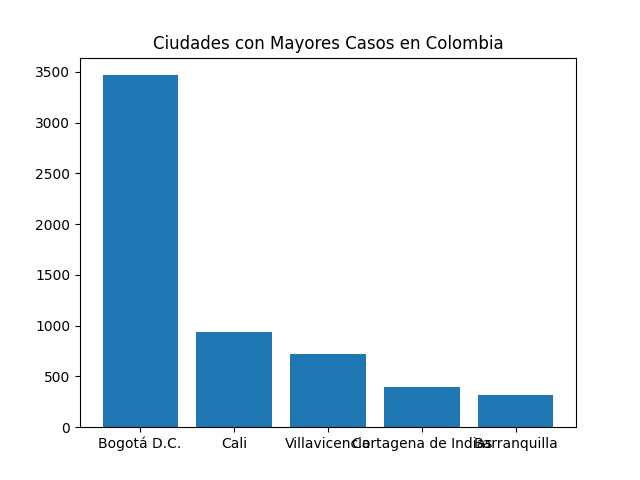

In [6]:
#Graficas exploratorias de Colombia
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

resultCities = df.groupBy('Ciudad de ubicación').count().orderBy('count',ascending=False)
x = resultCities.toPandas()['Ciudad de ubicación'].values.tolist()
y = resultCities.toPandas()['count'].values.tolist()

ax.bar(x[0:5],y[0:5])
ax.set_title('Ciudades con Mayores Casos en Colombia')

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

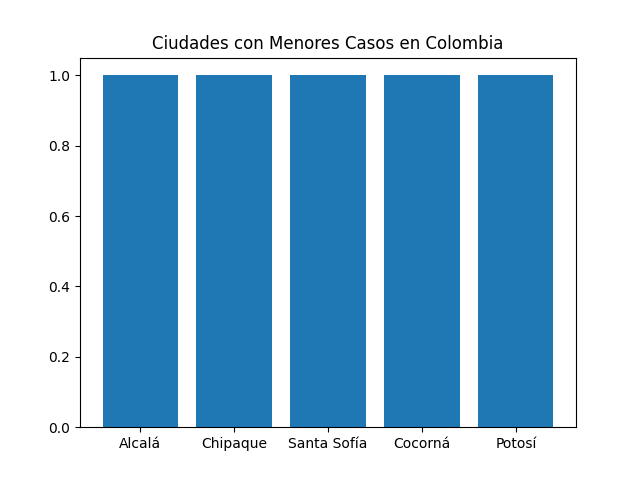

In [7]:
fig2, ax2 = plt.subplots()

resultLeastCities = df.groupBy('Ciudad de ubicación').count().orderBy('count',ascending=True)
x = resultLeastCities.toPandas()['Ciudad de ubicación'].values.tolist()
y = resultLeastCities.toPandas()['count'].values.tolist()

ax2.bar(x[1:6],y[1:6])
ax2.set_title('Ciudades con Menores Casos en Colombia')

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

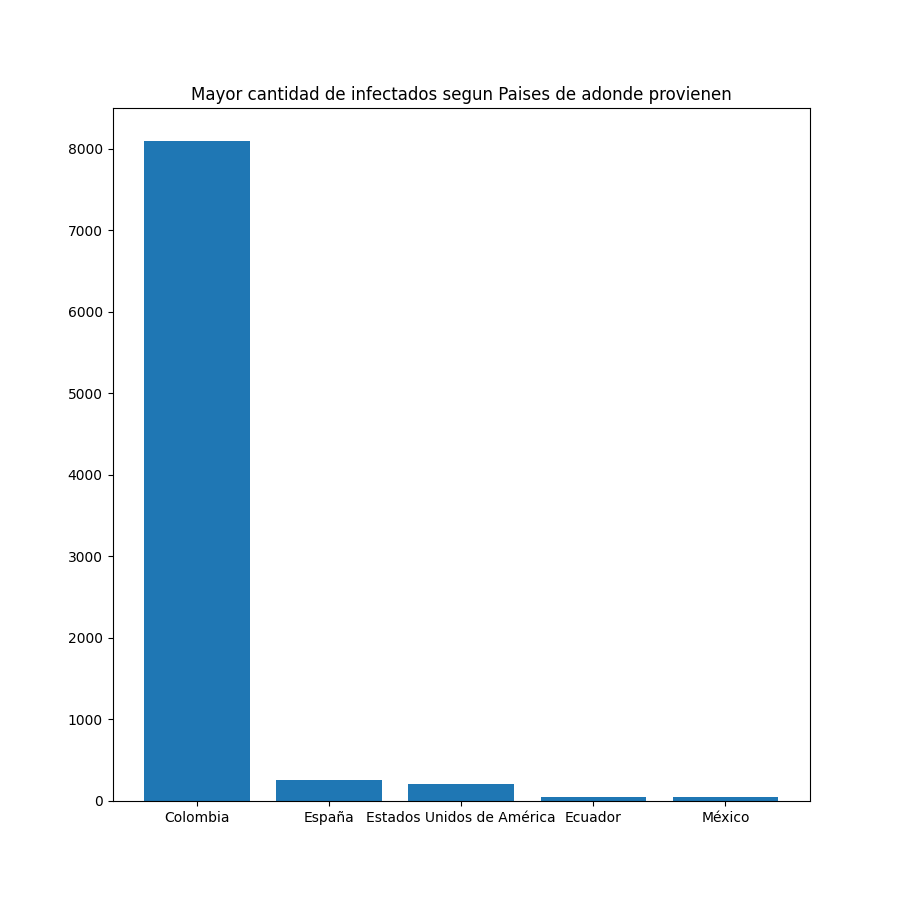

In [8]:
fig3, ax3 = plt.subplots()

fig3.set_figheight(9)
fig3.set_figwidth(9)

infection_from = df.groupBy('País de procedencia').count().orderBy('count',ascending=False)
x = infection_from.toPandas()['País de procedencia'].values.tolist()
y = infection_from.toPandas()['count'].values.tolist()

ax3.bar(x[0:5],y[0:5])
ax3.set_title('Mayor cantidad de infectados segun Paises de adonde provienen')


%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

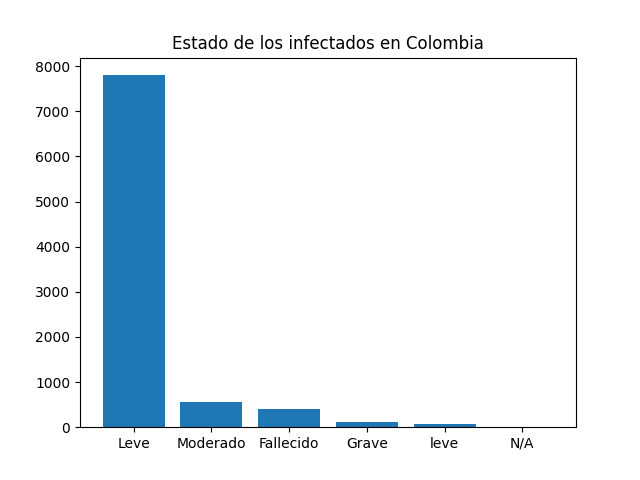

In [9]:
fig4, ax4 = plt.subplots()

infection_state = df.groupBy('Estado').count().orderBy('count',ascending=False)
x = infection_state.toPandas()['Estado'].values.tolist()
y = infection_state.toPandas()['count'].values.tolist()

ax4.bar(x[0:-1],y[0:-1])
ax4.set_title('Estado de los infectados en Colombia')


%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

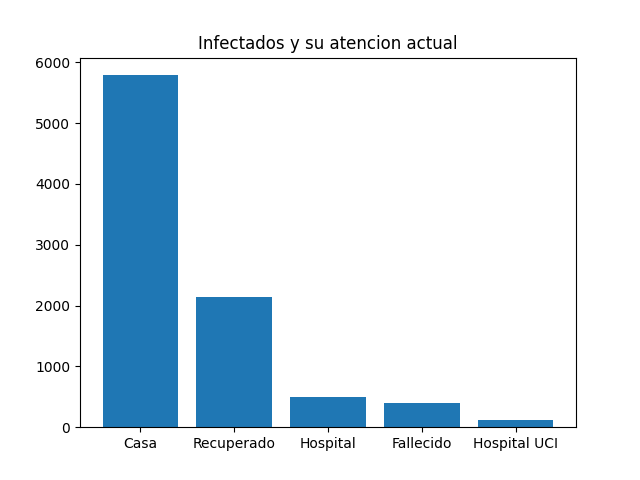

In [10]:
fig5, ax5 = plt.subplots()

infection_atention = df.groupBy('atención').count().orderBy('count',ascending=False)
x = infection_atention.toPandas()['atención'].values.tolist()
y = infection_atention.toPandas()['count'].values.tolist()

ax5.bar(x[0:-2],y[0:-2])
ax5.set_title('Infectados y su atencion actual')


%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

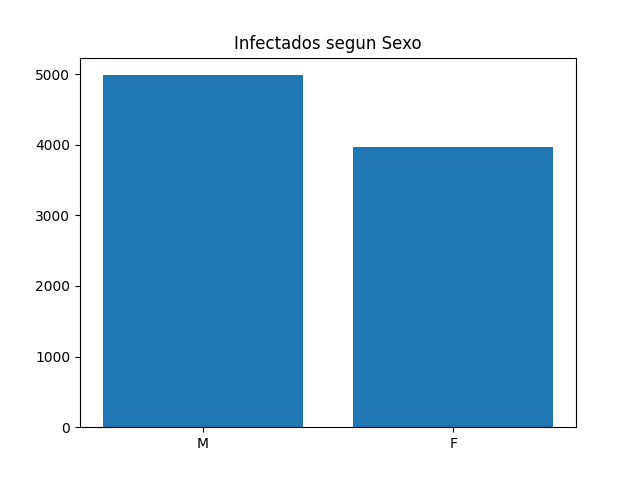

In [11]:
fig6, ax6 = plt.subplots()

infection_sex = df.groupBy('Sexo').count().orderBy('count',ascending=False)
x = infection_sex.toPandas()['Sexo'].values.tolist()
y = infection_sex.toPandas()['count'].values.tolist()

ax6.bar(x[0:-3],y[0:-3])
ax6.set_title('Infectados segun Sexo')


%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

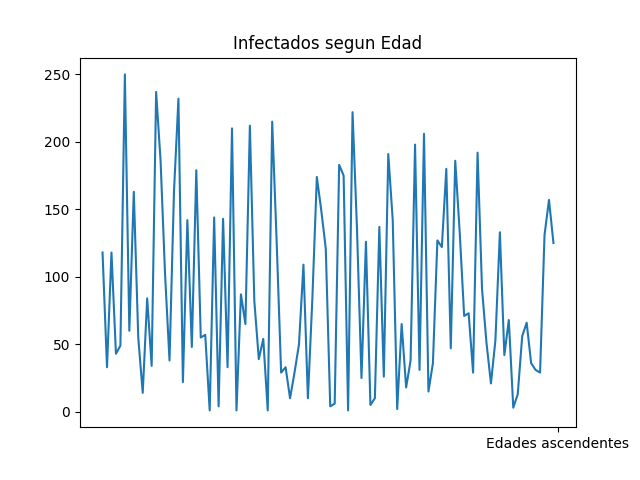

In [12]:
fig7, ax7 = plt.subplots()

infection_age = df.groupBy('Edad').count()
x = infection_age.toPandas()['Edad'].values.tolist()
y = infection_age.toPandas()['count'].values.tolist()

ax7.plot(x,y)
ax7.set_title('Infectados segun Edad')
ax7.set_xticks('Edades ascendentes')


%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

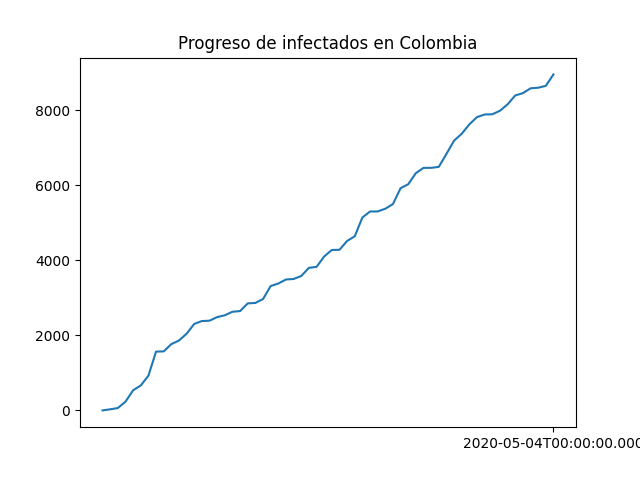

In [13]:
fig8, ax8 = plt.subplots()

acum = 0

infection_progress = df.groupBy('Fecha diagnostico').count()
x = infection_progress.toPandas()['Fecha diagnostico'].values.tolist()
y = infection_progress.toPandas()['count'].values.tolist()

for e in range(len(y)):
    acum += y[e]
    y[e] = acum

ax8.plot(x,y)
ax8.set_title('Progreso de infectados en Colombia')
ax8.set_xticks(x[-1:])

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

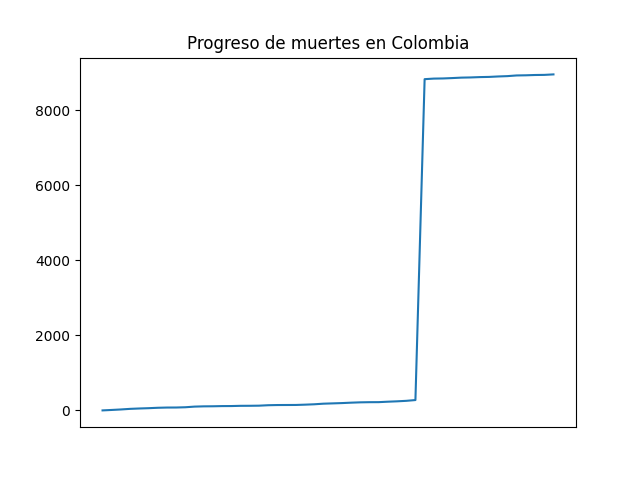

In [14]:
fig9, ax9 = plt.subplots()

acum = 0

infection_deaths = df.groupBy('Fecha de muerte').count()
x = infection_deaths.toPandas()['Fecha de muerte'].values.tolist()
y = infection_deaths.toPandas()['count'].values.tolist()

for e in range(len(y)):
    if x[e] is None:
        x[e] = 'NA';
    acum += y[e]
    y[e] = acum

ax9.plot(x,y)
ax9.set_title('Progreso de muertes en Colombia')
ax9.set_xticks([])

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

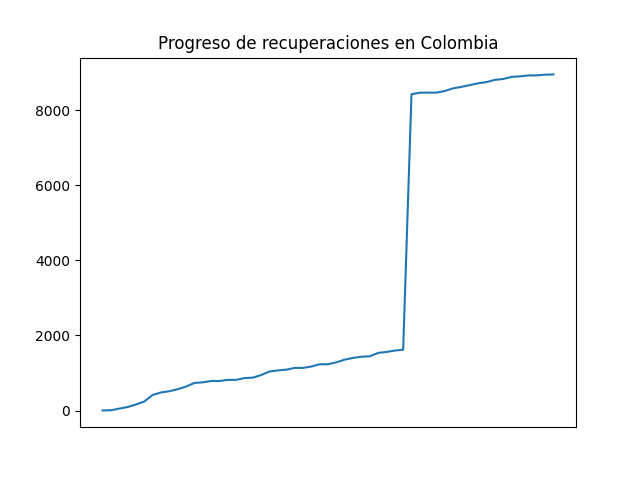

In [15]:
fig10, ax10 = plt.subplots()

acum = 0

infection_recover = df.groupBy('Fecha recuperado').count()
x = infection_recover.toPandas()['Fecha recuperado'].values.tolist()
y = infection_recover.toPandas()['count'].values.tolist()

for e in range(len(y)):
    if x[e] is None:
        x[e] = 'NA';
    acum += y[e]
    y[e] = acum

ax10.plot(x,y)
ax10.set_title('Progreso de recuperaciones en Colombia')
ax10.xaxis_date()
ax10.set_xticks([])

%matplot plt